# ResNet Model Building Pipeline for 1D Signals with DEMO
#### ResNet18, ResNet34, ResNet50, ResNet101, ResNet152

In [1]:
import socket
import tornado.iostream

# Create a TCP connection to a server running on localhost at port 8000
sock = socket.create_connection(('localhost', 8888))

# Create an IOStream object with a large buffer size
stream = tornado.iostream.IOStream(sock, max_buffer_size=1073741824)


In [2]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet
from sklearn.neighbors import LocalOutlierFactor

In [3]:
columns = ['Fx']
# columns = ['Fx','Fy','Fz','Mx','My','Mz']
wavelet = 'db4'
max_iter = 50
iter = 0

# Walking Dataset
InsoleWalking1 = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
InsoleWalking2 = pd.read_csv('0310HudaStand5Min1.txt', header=None, low_memory=False)
InsoleWalking3 = pd.read_csv('0311LalaStand5Min1.txt', header=None, low_memory=False)
InsoleWalking4 = pd.read_csv('0311YunitaStand5Min1.txt', header=None, low_memory=False)
InsoleWalking5 = pd.read_csv('0312AbelStand5Min1.txt', header=None, low_memory=False)
InsoleWalking6 = pd.read_csv('0312AbiStand5Min1.txt', header=None, low_memory=False)
InsoleWalking7 = pd.read_csv('0312AryaStand5Min1.txt', header=None, low_memory=False)
InsoleWalking8 = pd.read_csv('0312HawaStand5Min1.txt', header=None, low_memory=False)
InsoleWalking9 = pd.read_csv('0312NisaStand5Min1.txt', header=None, low_memory=False)
InsoleWalking10 = pd.read_csv('0313ChenChengStand5Min1.txt', header=None, low_memory=False)
InsoleWalking11 = pd.read_csv('0313RezaStand5Min1.txt', header=None, low_memory=False)
InsoleWalking12 = pd.read_csv('0313RilaniStand5Min1.txt', header=None, low_memory=False)
InsoleWalking13 = pd.read_csv('0313SariStand5Min1.txt', header=None, low_memory=False)
InsoleWalking14 = pd.read_csv('0313ShelbyStand5Min1.txt', header=None, low_memory=False)
InsoleWalking15 = pd.read_csv('0314HelenStand5Min1.txt', header=None, low_memory=False)
InsoleWalking16 = pd.read_csv('0315AyuStand5Min1.txt', header=None, low_memory=False)
InsoleWalking17 = pd.read_csv('0315HappyStand5Min1.txt', header=None, low_memory=False)
InsoleWalking18 = pd.read_csv('0317HeniStand5Min1.txt', header=None, low_memory=False)
InsoleWalking19 = pd.read_csv('0317NadiaStand5Min1.txt', header=None, low_memory=False)
InsoleWalking20 = pd.read_csv('0317VikaStand5Min1.txt', header=None, low_memory=False)
InsoleWalking21 = pd.read_csv('0319AlfianStand5Min1.txt', header=None, low_memory=False)
InsoleWalking22 = pd.read_csv('1225JakariaRWalk5Min.txt', header=None, low_memory=False)
SIDatasWalking1 =  np.array(InsoleWalking1)
SIDatasWalking2 =  np.array(InsoleWalking2)
SIDatasWalking3 =  np.array(InsoleWalking3)
SIDatasWalking4 =  np.array(InsoleWalking4)
SIDatasWalking5 =  np.array(InsoleWalking5)
SIDatasWalking6 =  np.array(InsoleWalking6)
SIDatasWalking7 =  np.array(InsoleWalking7)
SIDatasWalking8 =  np.array(InsoleWalking8)
SIDatasWalking9 =  np.array(InsoleWalking9)
SIDatasWalking10 =  np.array(InsoleWalking10)
SIDatasWalking11 =  np.array(InsoleWalking11)
SIDatasWalking12 =  np.array(InsoleWalking12)
SIDatasWalking13 =  np.array(InsoleWalking13)
SIDatasWalking14 =  np.array(InsoleWalking14)
SIDatasWalking15 =  np.array(InsoleWalking15)
SIDatasWalking16 =  np.array(InsoleWalking16)
SIDatasWalking17 =  np.array(InsoleWalking17)
SIDatasWalking18 =  np.array(InsoleWalking18)
SIDatasWalking19 =  np.array(InsoleWalking19)
SIDatasWalking20 =  np.array(InsoleWalking20)
SIDatasWalking21 =  np.array(InsoleWalking21)
SIDatasWalking22 =  np.array(InsoleWalking22)

dfwalk1 = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
dfwalk2 = pd.read_csv('0310HudaStand5Min1.csv', low_memory=False)
dfwalk3 = pd.read_csv('0311LalaStand5Min1.csv', low_memory=False)
dfwalk4 = pd.read_csv('0311YunitaStand5Min1.csv', low_memory=False)
dfwalk5 = pd.read_csv('0312AbelStand5Min1.csv', low_memory=False)
dfwalk6 = pd.read_csv('0312AbiStand5Min1.csv', low_memory=False)
dfwalk7 = pd.read_csv('0312AryaStand5Min1.csv', low_memory=False)
dfwalk8 = pd.read_csv('0312HawaStand5Min1.csv', low_memory=False)
dfwalk9 = pd.read_csv('0312NisaStand5Min1.csv', low_memory=False)
dfwalk10 = pd.read_csv('0313ChenChengStand5Min1.csv', low_memory=False)
dfwalk11 = pd.read_csv('0313RezaStand5Min1.csv', low_memory=False)
dfwalk12 = pd.read_csv('0313RilaniStand5Min1.csv', low_memory=False)
dfwalk13 = pd.read_csv('0313SariStand5Min1.csv', low_memory=False)
dfwalk14 = pd.read_csv('0313ShelbyStand5Min1.csv', low_memory=False)
dfwalk15 = pd.read_csv('0314HelenStand5Min1.csv', low_memory=False)
dfwalk16 = pd.read_csv('0315AyuStand5Min1.csv', low_memory=False)
dfwalk17 = pd.read_csv('0315HappyStand5Min1.csv', low_memory=False)
dfwalk18 = pd.read_csv('0317HeniStand5Min1.csv', low_memory=False)
dfwalk19 = pd.read_csv('0317NadiaStand5Min1.csv', low_memory=False)
dfwalk20 = pd.read_csv('0317VikaStand5Min1.csv', low_memory=False)
dfwalk21 = pd.read_csv('0319AlfianStand5Min1.csv', low_memory=False)
dfwalk22 = pd.read_csv('1225JakariaRWalk5Min.csv', low_memory=False)

selected_dfwalks1 = dfwalk1[columns]
selected_dfwalks2 = dfwalk2[columns]
selected_dfwalks3 = dfwalk3[columns]
selected_dfwalks4 = dfwalk4[columns]
selected_dfwalks5 = dfwalk5[columns]
selected_dfwalks6 = dfwalk6[columns]
selected_dfwalks7 = dfwalk7[columns]
selected_dfwalks8 = dfwalk8[columns]
selected_dfwalks9 = dfwalk9[columns]
selected_dfwalks10 = dfwalk10[columns]
selected_dfwalks11 = dfwalk11[columns]
selected_dfwalks12 = dfwalk12[columns]
selected_dfwalks13 = dfwalk13[columns]
selected_dfwalks14 = dfwalk14[columns]
selected_dfwalks15 = dfwalk15[columns]
selected_dfwalks16 = dfwalk16[columns]
selected_dfwalks17 = dfwalk17[columns]
selected_dfwalks18 = dfwalk18[columns]
selected_dfwalks19 = dfwalk19[columns]
selected_dfwalks20 = dfwalk20[columns]
selected_dfwalks21 = dfwalk21[columns]
selected_dfwalks22 = dfwalk22[columns]
FPDatasWalking1 = selected_dfwalks1[:15000]
FPDatasWalking2 = selected_dfwalks2[:15000]
FPDatasWalking3 = selected_dfwalks3[:15000]
FPDatasWalking4 = selected_dfwalks4[:15000]
FPDatasWalking5 = selected_dfwalks5[:15000]
FPDatasWalking6 = selected_dfwalks6[:15000]
FPDatasWalking7 = selected_dfwalks7[:15000]
FPDatasWalking8 = selected_dfwalks8[:15000]
FPDatasWalking9 = selected_dfwalks9[:15000]
FPDatasWalking10 = selected_dfwalks10[:15000]
FPDatasWalking11 = selected_dfwalks11[:15000]
FPDatasWalking12 = selected_dfwalks12[:15000]
FPDatasWalking13 = selected_dfwalks13[:15000]
FPDatasWalking14 = selected_dfwalks14[:15000]
FPDatasWalking15 = selected_dfwalks15[:15000]
FPDatasWalking16 = selected_dfwalks16[:15000]
FPDatasWalking17 = selected_dfwalks17[:15000]
FPDatasWalking18 = selected_dfwalks18[:15000]
FPDatasWalking19 = selected_dfwalks19[:15000]
FPDatasWalking20 = selected_dfwalks20[:15000]
FPDatasWalking21 = selected_dfwalks21[:15000]
FPDatasWalking22 = selected_dfwalks22[:15000]

SIDataWalking1 = np.array(SIDatasWalking1[:15000]).astype('float32')
SIDataWalking2 = np.array(SIDatasWalking2[:15000]).astype('float32')
SIDataWalking3 = np.array(SIDatasWalking3[:15000]).astype('float32')
SIDataWalking4 = np.array(SIDatasWalking4[:15000]).astype('float32')
SIDataWalking5 = np.array(SIDatasWalking5[:15000]).astype('float32')
SIDataWalking6 = np.array(SIDatasWalking6[:15000]).astype('float32')
SIDataWalking7 = np.array(SIDatasWalking7[:15000]).astype('float32')
SIDataWalking8 = np.array(SIDatasWalking8[:15000]).astype('float32')
SIDataWalking9 = np.array(SIDatasWalking9[:15000]).astype('float32')
SIDataWalking10 = np.array(SIDatasWalking10[:15000]).astype('float32')
SIDataWalking11 = np.array(SIDatasWalking11[:15000]).astype('float32')
SIDataWalking12 = np.array(SIDatasWalking12[:15000]).astype('float32')
SIDataWalking13 = np.array(SIDatasWalking13[:15000]).astype('float32')
SIDataWalking14 = np.array(SIDatasWalking14[:15000]).astype('float32')
SIDataWalking15 = np.array(SIDatasWalking15[:15000]).astype('float32')
SIDataWalking16 = np.array(SIDatasWalking16[:15000]).astype('float32')
SIDataWalking17 = np.array(SIDatasWalking17[:15000]).astype('float32')
SIDataWalking18 = np.array(SIDatasWalking18[:15000]).astype('float32')
SIDataWalking19 = np.array(SIDatasWalking19[:15000]).astype('float32')
SIDataWalking20 = np.array(SIDatasWalking20[:15000]).astype('float32')
SIDataWalking21 = np.array(SIDatasWalking21[:15000]).astype('float32')
SIDataWalking22 = np.array(SIDatasWalking22[:15000]).astype('float32')
FPDataWalking1 = np.array(FPDatasWalking1).astype('float32')
FPDataWalking2 = np.array(FPDatasWalking2).astype('float32')
FPDataWalking3= np.array(FPDatasWalking3).astype('float32')
FPDataWalking4= np.array(FPDatasWalking4).astype('float32')
FPDataWalking5= np.array(FPDatasWalking5).astype('float32')
FPDataWalking6= np.array(FPDatasWalking6).astype('float32')
FPDataWalking7= np.array(FPDatasWalking7).astype('float32')
FPDataWalking8= np.array(FPDatasWalking8).astype('float32')
FPDataWalking9= np.array(FPDatasWalking9).astype('float32')
FPDataWalking10 = np.array(FPDatasWalking10).astype('float32')
FPDataWalking11 = np.array(FPDatasWalking11).astype('float32')
FPDataWalking12= np.array(FPDatasWalking12).astype('float32')
FPDataWalking13= np.array(FPDatasWalking13).astype('float32')
FPDataWalking14= np.array(FPDatasWalking14).astype('float32')
FPDataWalking15= np.array(FPDatasWalking15).astype('float32')
FPDataWalking16= np.array(FPDatasWalking16).astype('float32')
FPDataWalking17= np.array(FPDatasWalking17).astype('float32')
FPDataWalking18= np.array(FPDatasWalking18).astype('float32')
FPDataWalking19= np.array(FPDatasWalking19).astype('float32')
FPDataWalking20= np.array(FPDatasWalking20).astype('float32')
FPDataWalking21= np.array(FPDatasWalking21).astype('float32')
FPDataWalking22= np.array(FPDatasWalking22).astype('float32')

SIDatasetWalking = np.concatenate((SIDataWalking1, SIDataWalking2, SIDataWalking3,
                            SIDataWalking4, SIDataWalking5, SIDataWalking6,
#                             SIDataWalking7, SIDataWalking8, SIDataWalking9,
                            SIDataWalking8, SIDataWalking9,
                            SIDataWalking10, SIDataWalking11, SIDataWalking12,
                            SIDataWalking13, SIDataWalking14, SIDataWalking15,
                            SIDataWalking16, SIDataWalking17, SIDataWalking18,
                            SIDataWalking19, SIDataWalking20, SIDataWalking21), axis=0)
                            
FPDatasetWalking = np.concatenate((FPDataWalking1, FPDataWalking2, FPDataWalking3,
                            FPDataWalking4, FPDataWalking5, FPDataWalking6,
#                             FPDataWalking7, FPDataWalking8, FPDataWalking9,
                            FPDataWalking8, FPDataWalking9,
                            FPDataWalking10, FPDataWalking11, FPDataWalking12,
                            FPDataWalking13, FPDataWalking14, FPDataWalking15,
                            FPDataWalking16, FPDataWalking17, FPDataWalking18,
                            FPDataWalking19, FPDataWalking20, FPDataWalking21), axis=0)

SIDatasetWalking = SIDatasetWalking
FPDatasetWalking = FPDatasetWalking

SIDatasetWalking = np.array(SIDatasetWalking).astype('float64')
FPDatasetWalking = np.array(FPDatasetWalking).astype('float64')

# Standing Dataset
InsoleStanding1 = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
InsoleStanding2 = pd.read_csv('0310HudaStand5Min2.txt', header=None, low_memory=False)
InsoleStanding3 = pd.read_csv('0311LalaStand5Min2.txt', header=None, low_memory=False)
InsoleStanding4 = pd.read_csv('0311YunitaStand5Min2.txt', header=None, low_memory=False)
InsoleStanding5 = pd.read_csv('0312AbelStand5Min2.txt', header=None, low_memory=False)
InsoleStanding6 = pd.read_csv('0312AbiStand5Min2.txt', header=None, low_memory=False)
InsoleStanding7 = pd.read_csv('0312AryaStand5Min2.txt', header=None, low_memory=False)
InsoleStanding8 = pd.read_csv('0312HawaStand5Min2.txt', header=None, low_memory=False)
InsoleStanding9 = pd.read_csv('0312NisaStand5Min2.txt', header=None, low_memory=False)
InsoleStanding10 = pd.read_csv('0313ChenChengStand5Min2.txt', header=None, low_memory=False)
InsoleStanding11 = pd.read_csv('0313RezaStand5Min2.txt', header=None, low_memory=False)
InsoleStanding12 = pd.read_csv('0313RilaniStand5Min2.txt', header=None, low_memory=False)
InsoleStanding13 = pd.read_csv('0313SariStand5Min2.txt', header=None, low_memory=False)
InsoleStanding14 = pd.read_csv('0313ShelbyStand5Min2.txt', header=None, low_memory=False)
InsoleStanding15 = pd.read_csv('0314HelenStand5Min2.txt', header=None, low_memory=False)
InsoleStanding16 = pd.read_csv('0315AyuStand5Min2.txt', header=None, low_memory=False)
InsoleStanding17 = pd.read_csv('0315HappyStand5Min2.txt', header=None, low_memory=False)
InsoleStanding18 = pd.read_csv('0317HeniStand5Min2.txt', header=None, low_memory=False)
InsoleStanding19 = pd.read_csv('0317NadiaStand5Min2.txt', header=None, low_memory=False)
InsoleStanding20 = pd.read_csv('0317VikaStand5Min2.txt', header=None, low_memory=False)
InsoleStanding21 = pd.read_csv('0319AlfianStand5Min2.txt', header=None, low_memory=False)
InsoleStanding22 = pd.read_csv('0310JakaStand2Min.txt', header=None, low_memory=False)
SIDatasStanding1 =  np.array(InsoleStanding1)
SIDatasStanding2 =  np.array(InsoleStanding2)
SIDatasStanding3 =  np.array(InsoleStanding3)
SIDatasStanding4 =  np.array(InsoleStanding4)
SIDatasStanding5 =  np.array(InsoleStanding5)
SIDatasStanding6 =  np.array(InsoleStanding6)
SIDatasStanding7 =  np.array(InsoleStanding7)
SIDatasStanding8 =  np.array(InsoleStanding8)
SIDatasStanding9 =  np.array(InsoleStanding9)
SIDatasStanding10 =  np.array(InsoleStanding10)
SIDatasStanding11 =  np.array(InsoleStanding11)
SIDatasStanding12 =  np.array(InsoleStanding12)
SIDatasStanding13 =  np.array(InsoleStanding13)
SIDatasStanding14 =  np.array(InsoleStanding14)
SIDatasStanding15 =  np.array(InsoleStanding15)
SIDatasStanding16 =  np.array(InsoleStanding16)
SIDatasStanding17 =  np.array(InsoleStanding17)
SIDatasStanding18 =  np.array(InsoleStanding18)
SIDatasStanding19 =  np.array(InsoleStanding19)
SIDatasStanding20 =  np.array(InsoleStanding20)
SIDatasStanding21 =  np.array(InsoleStanding21)
SIDatasStanding22 =  np.array(InsoleStanding22)

dfStanding1 = pd.read_csv('0310AyuStand5Min2.csv', low_memory=False)
dfStanding2 = pd.read_csv('0310HudaStand5Min2.csv', low_memory=False)
dfStanding3 = pd.read_csv('0311LalaStand5Min2.csv', low_memory=False)
dfStanding4 = pd.read_csv('0311YunitaStand5Min2.csv', low_memory=False)
dfStanding5 = pd.read_csv('0312AbelStand5Min2.csv', low_memory=False)
dfStanding6 = pd.read_csv('0312AbiStand5Min2.csv', low_memory=False)
dfStanding7 = pd.read_csv('0312AryaStand5Min2.csv', low_memory=False)
dfStanding8 = pd.read_csv('0312HawaStand5Min2.csv', low_memory=False)
dfStanding9 = pd.read_csv('0312NisaStand5Min2.csv', low_memory=False)
dfStanding10 = pd.read_csv('0313ChenChengStand5Min2.csv', low_memory=False)
dfStanding11 = pd.read_csv('0313RezaStand5Min2.csv', low_memory=False)
dfStanding12 = pd.read_csv('0313RilaniStand5Min2.csv', low_memory=False)
dfStanding13 = pd.read_csv('0313SariStand5Min2.csv', low_memory=False)
dfStanding14 = pd.read_csv('0313ShelbyStand5Min2.csv', low_memory=False)
dfStanding15 = pd.read_csv('0314HelenStand5Min2.csv', low_memory=False)
dfStanding16 = pd.read_csv('0315AyuStand5Min2.csv', low_memory=False)
dfStanding17 = pd.read_csv('0315HappyStand5Min2.csv', low_memory=False)
dfStanding18 = pd.read_csv('0317HeniStand5Min2.csv', low_memory=False)
dfStanding19 = pd.read_csv('0317NadiaStand5Min2.csv', low_memory=False)
dfStanding20 = pd.read_csv('0317VikaStand5Min2.csv', low_memory=False)
dfStanding21 = pd.read_csv('0319AlfianStand5Min2.csv', low_memory=False)
dfStanding22 = pd.read_csv('0310JakaStand2Min.csv', low_memory=False)

selected_dfStandings1 = dfStanding1[columns]
selected_dfStandings2 = dfStanding2[columns]
selected_dfStandings3 = dfStanding3[columns]
selected_dfStandings4 = dfStanding4[columns]
selected_dfStandings5 = dfStanding5[columns]
selected_dfStandings6 = dfStanding6[columns]
selected_dfStandings7 = dfStanding7[columns]
selected_dfStandings8 = dfStanding8[columns]
selected_dfStandings9 = dfStanding9[columns]
selected_dfStandings10 = dfStanding10[columns]
selected_dfStandings11 = dfStanding11[columns]
selected_dfStandings12 = dfStanding12[columns]
selected_dfStandings13 = dfStanding13[columns]
selected_dfStandings14 = dfStanding14[columns]
selected_dfStandings15 = dfStanding15[columns]
selected_dfStandings16 = dfStanding16[columns]
selected_dfStandings17 = dfStanding17[columns]
selected_dfStandings18 = dfStanding18[columns]
selected_dfStandings19 = dfStanding19[columns]
selected_dfStandings20 = dfStanding20[columns]
selected_dfStandings21 = dfStanding21[columns]
selected_dfStandings22 = dfStanding22[columns]
FPDataStandings1 = selected_dfStandings1[:15000]
FPDataStandings2 = selected_dfStandings2[:15000]
FPDataStandings3 = selected_dfStandings3[:15000]
FPDataStandings4 = selected_dfStandings4[:15000]
FPDataStandings5 = selected_dfStandings5[:15000]
FPDataStandings6 = selected_dfStandings6[:15000]
FPDataStandings7 = selected_dfStandings7[:15000]
FPDataStandings8 = selected_dfStandings8[:15000]
FPDataStandings9 = selected_dfStandings9[:15000]
FPDataStandings10 = selected_dfStandings10[:15000]
FPDataStandings11 = selected_dfStandings11[:15000]
FPDataStandings12 = selected_dfStandings12[:15000]
FPDataStandings13 = selected_dfStandings13[:15000]
FPDataStandings14 = selected_dfStandings14[:15000]
FPDataStandings15 = selected_dfStandings15[:15000]
FPDataStandings16 = selected_dfStandings16[:15000]
FPDataStandings17 = selected_dfStandings17[:15000]
FPDataStandings18 = selected_dfStandings18[:15000]
FPDataStandings19 = selected_dfStandings19[:15000]
FPDataStandings20 = selected_dfStandings20[:15000]
FPDataStandings21 = selected_dfStandings21[:15000]
FPDataStandings22 = selected_dfStandings22[:15000]

SIDataStanding1 = np.array(SIDatasStanding1[:15000]).astype('float32')
SIDataStanding2 = np.array(SIDatasStanding2[:15000]).astype('float32')
SIDataStanding3 = np.array(SIDatasStanding3[:15000]).astype('float32')
SIDataStanding4 = np.array(SIDatasStanding4[:15000]).astype('float32')
SIDataStanding5 = np.array(SIDatasStanding5[:15000]).astype('float32')
SIDataStanding6 = np.array(SIDatasStanding6[:15000]).astype('float32')
SIDataStanding7 = np.array(SIDatasStanding7[:15000]).astype('float32')
SIDataStanding8 = np.array(SIDatasStanding8[:15000]).astype('float32')
SIDataStanding9 = np.array(SIDatasStanding9[:15000]).astype('float32')
SIDataStanding10 = np.array(SIDatasStanding10[:15000]).astype('float32')
SIDataStanding11 = np.array(SIDatasStanding11[:15000]).astype('float32')
SIDataStanding12 = np.array(SIDatasStanding12[:15000]).astype('float32')
SIDataStanding13 = np.array(SIDatasStanding13[:15000]).astype('float32')
SIDataStanding14 = np.array(SIDatasStanding14[:15000]).astype('float32')
SIDataStanding15 = np.array(SIDatasStanding15[:15000]).astype('float32')
SIDataStanding16 = np.array(SIDatasStanding16[:15000]).astype('float32')
SIDataStanding17 = np.array(SIDatasStanding17[:15000]).astype('float32')
SIDataStanding18 = np.array(SIDatasStanding18[:15000]).astype('float32')
SIDataStanding19 = np.array(SIDatasStanding19[:15000]).astype('float32')
SIDataStanding20 = np.array(SIDatasStanding20[:15000]).astype('float32')
SIDataStanding21 = np.array(SIDatasStanding21[:15000]).astype('float32')
SIDataStanding22 = np.array(SIDatasStanding22[:15000]).astype('float32')
FPDataStanding1 = np.array(FPDataStandings1).astype('float32')
FPDataStanding2 = np.array(FPDataStandings2).astype('float32')
FPDataStanding3= np.array(FPDataStandings3).astype('float32')
FPDataStanding4= np.array(FPDataStandings4).astype('float32')
FPDataStanding5= np.array(FPDataStandings5).astype('float32')
FPDataStanding6= np.array(FPDataStandings6).astype('float32')
FPDataStanding7= np.array(FPDataStandings7).astype('float32')
FPDataStanding8= np.array(FPDataStandings8).astype('float32')
FPDataStanding9= np.array(FPDataStandings9).astype('float32')
FPDataStanding10 = np.array(FPDataStandings10).astype('float32')
FPDataStanding11 = np.array(FPDataStandings11).astype('float32')
FPDataStanding12= np.array(FPDataStandings12).astype('float32')
FPDataStanding13= np.array(FPDataStandings13).astype('float32')
FPDataStanding14= np.array(FPDataStandings14).astype('float32')
FPDataStanding15= np.array(FPDataStandings15).astype('float32')
FPDataStanding16= np.array(FPDataStandings16).astype('float32')
FPDataStanding17= np.array(FPDataStandings17).astype('float32')
FPDataStanding18= np.array(FPDataStandings18).astype('float32')
FPDataStanding19= np.array(FPDataStandings19).astype('float32')
FPDataStanding20= np.array(FPDataStandings20).astype('float32')
FPDataStanding21= np.array(FPDataStandings21).astype('float32')
FPDataStanding22= np.array(FPDataStandings22).astype('float32')

SIDatasetStanding = np.concatenate((SIDataStanding1, SIDataStanding2, SIDataStanding3,
                            SIDataStanding4, SIDataStanding5, SIDataStanding6,
#                             SIDataStanding7, SIDataStanding8, SIDataStanding9,
                            SIDataStanding8, SIDataStanding9,
                            SIDataStanding10, SIDataStanding11, SIDataStanding12,
                            SIDataStanding13, SIDataStanding14, SIDataStanding15,
                            SIDataStanding16, SIDataStanding17, SIDataStanding18,
                            SIDataStanding19, SIDataStanding20, SIDataStanding21), axis=0)

# SIDatasetStanding = np.concatenate((SIDataStanding13, SIDataStanding20, SIDataStanding17, 
#                        SIDataStanding15, SIDataStanding12, SIDataStanding22, SIDataStanding1, SIDataStanding4, SIDataStanding8, 
#                        SIDataStanding16, SIDataStanding9, SIDataStanding6, SIDataStanding7, SIDataStanding3,
#                        SIDataStanding19, SIDataStanding10), axis=0)

# SIDatasetStanding = np.concatenate((SIDataStanding1, SIDataStanding2, SIDataStanding3), axis=0)
# FPDatasetStanding = np.concatenate((FPDataStanding1, FPDataStanding2, FPDataStanding3), axis=0)
                        
FPDatasetStanding = np.concatenate((FPDataStanding1, FPDataStanding2, FPDataStanding3,
                            FPDataStanding4, FPDataStanding5, FPDataStanding6,
#                             FPDataStanding7, FPDataStanding8, FPDataStanding9,
                            FPDataStanding8, FPDataStanding9,
                            FPDataStanding10, FPDataStanding11, FPDataStanding12,
                            FPDataStanding13, FPDataStanding14, FPDataStanding15,
                            FPDataStanding16, FPDataStanding17, FPDataStanding18,
                            FPDataStanding19, FPDataStanding20, FPDataStanding21), axis=0)

# FPDatasetStanding = np.concatenate((FPDataStanding13, FPDataStanding20, FPDataStanding17, 
#                        FPDataStanding15, FPDataStanding12, FPDataStanding22, FPDataStanding1, FPDataStanding4, FPDataStanding8, 
#                        FPDataStanding16, FPDataStanding9, FPDataStanding6, FPDataStanding7, FPDataStanding3,
#                        FPDataStanding19, FPDataStanding10), axis=0)

SIDatasetStanding = SIDatasetStanding
FPDatasetStanding = FPDatasetStanding

SIDatasetStanding = np.array(SIDatasetStanding).astype('float32')
FPDatasetStanding = np.array(FPDatasetStanding).astype('float32')

# Concat Standing and Walking
SIDataset = np.concatenate((SIDatasetWalking,SIDatasetStanding), axis=0)
FPDataset = np.concatenate((FPDatasetWalking,FPDatasetStanding), axis=0)
# SIDataset = SIDatasetStanding
# FPDataset = FPDatasetStanding

# SIDataset = SIDatasetStanding
# FPDataset = FPDatasetStanding


# Data Cleaning: Remove or correct mislabeled instances in your dataset
# outlier_detector = LocalOutlierFactor(novelty=True)
# outlier_detector.fit(FPDataset)
# outlier_mask = outlier_detector.predict(FPDataset)
# cleaned_smart_insole_data_scaled = SIDataset[outlier_mask == 1]
# cleaned_force_plate_data_scaled = FPDataset[outlier_mask == 1]


## End Load Data
for i in range(len(SIDataset)):
    SIDataset[i][0] = np.round(SIDataset[i][0] + (iter % max_iter) + 1,0)
    iter += 1
    
# FPDataPreAdjusted = FPDataset.copy()
# for i in range(len(FPDataPreAdjusted)):
#     # FPDataPreAdjusted[i][0] = FPDataPreAdjusted[i][0] + (iter % max_iter) + 1
#     FPDataPreAdjusted[i][0] = FPDataPreAdjusted[i][0] + ((iter % max_iter) + 1) * 1.5
#     iter += 1

    
     
# Data Normalization
# scaler_SI = MinMaxScaler(feature_range=(0, 1))
# scaler_SI.fit(SIData_filtered)
# scaler_fx = MinMaxScaler(feature_range=(0, 1))
# scaler_fx.fit(FPDataset[:, 0].reshape(-1, 1))
# scaler_fy = MinMaxScaler(feature_range=(0, 1))
# scaler_fy.fit(FPDataset[:, 1].reshape(-1, 1))
# scaler_fz = MinMaxScaler(feature_range=(0, 1))
# scaler_fz.fit(FPDataset[:, 2].reshape(-1, 1))
# scaler_mx = MinMaxScaler(feature_range=(0, 1))
# scaler_mx.fit(FPDataset[:, 3].reshape(-1, 1))
# scaler_my = MinMaxScaler(feature_range=(0, 1))
# scaler_my.fit(FPDataset[:, 4].reshape(-1, 1))
# scaler_mz = MinMaxScaler(feature_range=(0, 1))
# scaler_mz.fit(FPDataset[:, 5].reshape(-1, 1))

# Normalize each feature separately
# normalized_SIData = scaler_SI.transform(SIData_filtered)
# normalized_fx = scaler_fx.transform(FPDataset[:, 0].reshape(-1, 1))
# normalized_fy = scaler_fy.transform(FPDataset[:, 1].reshape(-1, 1))
# normalized_fz = scaler_fz.transform(FPDataset[:, 2].reshape(-1, 1))
# normalized_mx = scaler_mx.transform(FPDataset[:, 3].reshape(-1, 1))
# normalized_my = scaler_my.transform(FPDataset[:, 4].reshape(-1, 1))
# normalized_mz = scaler_mz.transform(FPDataset[:, 5].reshape(-1, 1))

scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_x.fit(SIDataset)
xscale = scaler_x.transform(SIDataset)

scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_y.fit(FPDataset)
yscale = scaler_y.transform(FPDataset)


# Combine the normalized features back into a single numpy array
# normalized_FPData= np.concatenate((normalized_fx, normalized_fy, normalized_fz, 
#                                               normalized_mx, normalized_my, normalized_mz), axis=1)
#End Data Normalization

#Spliting Data
sample_size = xscale.shape[0] # number of samples in train set
time_steps  = xscale.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = xscale.reshape(sample_size,time_steps,input_dimension)

# Generate random indices for shuffling the data
indices = np.arange(train_data_reshaped.shape[0])
np.random.shuffle(indices)

# Use the shuffled indices to randomly select training data
X_train = train_data_reshaped[indices[:]]
y_train = yscale[indices[:]]

# X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped, normalized_fx, test_size=0.20, random_state=2)

print(X_train.shape,y_train.shape)
# print(y_train.shape,y_test.shape)
#End Spliting Data

(600000, 89, 1) (600000, 1)


In [4]:
FPDataset[:10]

array([[9.27914047],
       [9.3324604 ],
       [9.26303005],
       [9.30597019],
       [9.65939999],
       [9.04283047],
       [8.88866043],
       [8.89955997],
       [9.10622025],
       [8.99438   ]])

In [5]:
print(FPDataset[50])

[9.50547028]


In [6]:
print(SIDataset[50])

[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  47.  61.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  54.  45.   0.   0.   0.   0.   0.
   0.  30.  51.  40.   0.  17.   0.   0.   0.   0.   0.   0.  61.  51.
   4.   6.  23.  11.   0.  15.  18.  51.  70.   0.   0.   0.   0.   0.
   0.   0.  10.  21.   0.   9.  29.   9.  83. 119.  64.  90.  36.   0.
   8.   0.   0.   0.  45. 110. 121.  90.   0.  55.   0.   0.   0.  50.
   0.   0.   0.   0.   0.]


In [7]:
FPDataset[50:55]

array([[ 9.50547028],
       [10.42500019],
       [10.33590031],
       [ 9.32063007],
       [ 9.67984962]])

Configurations

In [8]:
"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode

Build Model

In [9]:
# class AdamW(Adam):
#     def __init__(self, learning_rate=0.0001, weight_decay=0.01, **kwargs):
#         super(AdamW, self).__init__(learning_rate, **kwargs)
#         self.weight_decay = weight_decay

#     def get_gradients(self, loss, params):
#         gradients = super(AdamW, self).get_gradients(loss, params)
#         if self.weight_decay > 0.0:
#             for i in range(len(gradients)):
#                 if gradients[i] is not None:
#                     gradients[i] += self.weight_decay * params[i]
#         return gradients

# Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).ResNet18() # Build Model
# # ResNet Models supported: ResNet18, ResNet34, ResNet50, ResNet101, ResNet152, 
# Regression_Model.compile(loss='mse', optimizer=AdamW(learning_rate=0.0001, weight_decay=0.01), metrics= ['mse']) # Compile Model
# # Here, Model validation metric is set as Mean Squared Error or MSE

In [10]:
Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).ResNet18() # Build Model
# ResNet Models supported: ResNet18, ResNet34, ResNet50, ResNet101, ResNet152, 
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model
# Here, Model validation metric is set as Mean Squared Error or MSE

Model_Summary

In [11]:
Regression_Model.summary() # Summary of the Model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 45, 64)       512         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 45, 64)       0           ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 22, 64)       0           ['activation[0][0]']             
                                                                                              

 conv1d_14 (Conv1D)             (None, 3, 512)       786944      ['activation_17[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 3, 512)       0           ['conv1d_14[0][0]']              
                                                                                                  
 conv1d_15 (Conv1D)             (None, 3, 512)       786944      ['activation_18[0][0]']          
                                                                                                  
 activation_19 (Activation)     (None, 3, 512)       0           ['conv1d_15[0][0]']              
                                                                                                  
 conv1d_16 (Conv1D)             (None, 3, 512)       786944      ['activation_19[0][0]']          
                                                                                                  
 activatio

Upload Past Weights if available (Transfer Learning)

In [12]:
# Regression_Model.load_weights('Saved_Model.h5') # Load Previously Trained Weights for Transfer Learning

Train Model for 'n' number of Epochs with Batch size of 'm'

In [13]:
# Early Stopping and Model_Checkpoints are optional parameters
# Early Stopping is to stop the training based on certain condition set by the user
# Model Checkpoint is to save a model in a directory basped on certain conditions so that it can be used later for Transfer Learning or avoiding retraining
callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)
# Save 'History' of the model for model performance analysis performed later

Epoch 1/500
7496/7500 [============================>.] - ETA: 0s - loss: 0.0190 - mse: 0.0190
Epoch 1: val_loss improved from inf to 0.00045, saving model to Saved_Model.h5
7500/7500 [==============================] - 94s 12ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 4.5437e-04 - val_mse: 4.5437e-04
Epoch 2/500
7497/7500 [============================>.] - ETA: 0s - loss: 5.3248e-04 - mse: 5.3248e-04
Epoch 2: val_loss improved from 0.00045 to 0.00041, saving model to Saved_Model.h5
7500/7500 [==============================] - 91s 12ms/step - loss: 5.3244e-04 - mse: 5.3244e-04 - val_loss: 4.1208e-04 - val_mse: 4.1208e-04
Epoch 3/500
7495/7500 [============================>.] - ETA: 0s - loss: 4.4237e-04 - mse: 4.4237e-04
Epoch 3: val_loss improved from 0.00041 to 0.00039, saving model to Saved_Model.h5
7500/7500 [==============================] - 92s 12ms/step - loss: 4.4240e-04 - mse: 4.4240e-04 - val_loss: 3.8512e-04 - val_mse: 3.8512e-04
Epoch 4/500
7499/7500 [===================

Epoch 27/500
7499/7500 [============================>.] - ETA: 0s - loss: 2.2755e-04 - mse: 2.2755e-04
Epoch 27: val_loss did not improve from 0.00023
7500/7500 [==============================] - 92s 12ms/step - loss: 2.2755e-04 - mse: 2.2755e-04 - val_loss: 2.3850e-04 - val_mse: 2.3850e-04
Epoch 28/500
7499/7500 [============================>.] - ETA: 0s - loss: 2.2435e-04 - mse: 2.2435e-04
Epoch 28: val_loss did not improve from 0.00023
7500/7500 [==============================] - 91s 12ms/step - loss: 2.2435e-04 - mse: 2.2435e-04 - val_loss: 2.3234e-04 - val_mse: 2.3234e-04
Epoch 29/500
7496/7500 [============================>.] - ETA: 0s - loss: 2.2051e-04 - mse: 2.2051e-04
Epoch 29: val_loss improved from 0.00023 to 0.00022, saving model to Saved_Model.h5
7500/7500 [==============================] - 91s 12ms/step - loss: 2.2050e-04 - mse: 2.2050e-04 - val_loss: 2.2110e-04 - val_mse: 2.2110e-04
Epoch 30/500
7496/7500 [============================>.] - ETA: 0s - loss: 2.1916e-04 - m

Epoch 54/500
7499/7500 [============================>.] - ETA: 0s - loss: 1.7214e-04 - mse: 1.7214e-04
Epoch 54: val_loss did not improve from 0.00018
7500/7500 [==============================] - 89s 12ms/step - loss: 1.7215e-04 - mse: 1.7215e-04 - val_loss: 1.8332e-04 - val_mse: 1.8332e-04
Epoch 55/500
7496/7500 [============================>.] - ETA: 0s - loss: 1.7045e-04 - mse: 1.7045e-04
Epoch 55: val_loss did not improve from 0.00018
7500/7500 [==============================] - 89s 12ms/step - loss: 1.7045e-04 - mse: 1.7045e-04 - val_loss: 1.9681e-04 - val_mse: 1.9681e-04
Epoch 56/500
7497/7500 [============================>.] - ETA: 0s - loss: 1.7015e-04 - mse: 1.7015e-04
Epoch 56: val_loss improved from 0.00018 to 0.00018, saving model to Saved_Model.h5
7500/7500 [==============================] - 92s 12ms/step - loss: 1.7015e-04 - mse: 1.7015e-04 - val_loss: 1.7701e-04 - val_mse: 1.7701e-04
Epoch 57/500
7497/7500 [============================>.] - ETA: 0s - loss: 1.6835e-04 - m

Epoch 81/500
7499/7500 [============================>.] - ETA: 0s - loss: 1.4600e-04 - mse: 1.4600e-04
Epoch 81: val_loss improved from 0.00016 to 0.00016, saving model to Saved_Model.h5
7500/7500 [==============================] - 89s 12ms/step - loss: 1.4600e-04 - mse: 1.4600e-04 - val_loss: 1.5809e-04 - val_mse: 1.5809e-04
Epoch 82/500
7497/7500 [============================>.] - ETA: 0s - loss: 1.4507e-04 - mse: 1.4507e-04
Epoch 82: val_loss did not improve from 0.00016
7500/7500 [==============================] - 88s 12ms/step - loss: 1.4506e-04 - mse: 1.4506e-04 - val_loss: 1.6056e-04 - val_mse: 1.6056e-04
Epoch 83/500
7499/7500 [============================>.] - ETA: 0s - loss: 1.4412e-04 - mse: 1.4412e-04
Epoch 83: val_loss did not improve from 0.00016
7500/7500 [==============================] - 88s 12ms/step - loss: 1.4413e-04 - mse: 1.4413e-04 - val_loss: 1.6154e-04 - val_mse: 1.6154e-04
Epoch 84/500
7500/7500 [==============================] - ETA: 0s - loss: 1.4468e-04 - m

7499/7500 [============================>.] - ETA: 0s - loss: 1.3031e-04 - mse: 1.3031e-04
Epoch 108: val_loss did not improve from 0.00015
7500/7500 [==============================] - 89s 12ms/step - loss: 1.3031e-04 - mse: 1.3031e-04 - val_loss: 1.5338e-04 - val_mse: 1.5338e-04
Epoch 109/500
7500/7500 [==============================] - ETA: 0s - loss: 1.2988e-04 - mse: 1.2988e-04
Epoch 109: val_loss did not improve from 0.00015
7500/7500 [==============================] - 89s 12ms/step - loss: 1.2988e-04 - mse: 1.2988e-04 - val_loss: 1.4981e-04 - val_mse: 1.4981e-04
Epoch 110/500
7500/7500 [==============================] - ETA: 0s - loss: 1.2964e-04 - mse: 1.2964e-04
Epoch 110: val_loss improved from 0.00015 to 0.00015, saving model to Saved_Model.h5
7500/7500 [==============================] - 89s 12ms/step - loss: 1.2964e-04 - mse: 1.2964e-04 - val_loss: 1.4795e-04 - val_mse: 1.4795e-04
Epoch 111/500
7498/7500 [============================>.] - ETA: 0s - loss: 1.2910e-04 - mse: 1.2

7496/7500 [============================>.] - ETA: 0s - loss: 1.2087e-04 - mse: 1.2087e-04
Epoch 135: val_loss did not improve from 0.00014
7500/7500 [==============================] - 88s 12ms/step - loss: 1.2087e-04 - mse: 1.2087e-04 - val_loss: 1.4492e-04 - val_mse: 1.4492e-04
Epoch 136/500
7500/7500 [==============================] - ETA: 0s - loss: 1.2016e-04 - mse: 1.2016e-04
Epoch 136: val_loss did not improve from 0.00014
7500/7500 [==============================] - 89s 12ms/step - loss: 1.2016e-04 - mse: 1.2016e-04 - val_loss: 1.5278e-04 - val_mse: 1.5278e-04
Epoch 137/500
7500/7500 [==============================] - ETA: 0s - loss: 1.1970e-04 - mse: 1.1970e-04
Epoch 137: val_loss did not improve from 0.00014
7500/7500 [==============================] - 88s 12ms/step - loss: 1.1970e-04 - mse: 1.1970e-04 - val_loss: 1.4566e-04 - val_mse: 1.4566e-04
Epoch 138/500
7500/7500 [==============================] - ETA: 0s - loss: 1.1990e-04 - mse: 1.1990e-04
Epoch 138: val_loss improved

7500/7500 [==============================] - 88s 12ms/step - loss: 1.1391e-04 - mse: 1.1391e-04 - val_loss: 1.4136e-04 - val_mse: 1.4136e-04
Epoch 163/500
7496/7500 [============================>.] - ETA: 0s - loss: 1.1379e-04 - mse: 1.1379e-04
Epoch 163: val_loss did not improve from 0.00014
7500/7500 [==============================] - 88s 12ms/step - loss: 1.1379e-04 - mse: 1.1379e-04 - val_loss: 1.4496e-04 - val_mse: 1.4496e-04
Epoch 164/500
7497/7500 [============================>.] - ETA: 0s - loss: 1.1405e-04 - mse: 1.1405e-04
Epoch 164: val_loss did not improve from 0.00014
7500/7500 [==============================] - 88s 12ms/step - loss: 1.1405e-04 - mse: 1.1405e-04 - val_loss: 1.4477e-04 - val_mse: 1.4477e-04
Epoch 165/500
7500/7500 [==============================] - ETA: 0s - loss: 1.1276e-04 - mse: 1.1276e-04
Epoch 165: val_loss did not improve from 0.00014
7500/7500 [==============================] - 88s 12ms/step - loss: 1.1276e-04 - mse: 1.1276e-04 - val_loss: 1.4257e-04

Epoch 190/500
7499/7500 [============================>.] - ETA: 0s - loss: 1.0836e-04 - mse: 1.0836e-04
Epoch 190: val_loss did not improve from 0.00014
7500/7500 [==============================] - 88s 12ms/step - loss: 1.0836e-04 - mse: 1.0836e-04 - val_loss: 1.3903e-04 - val_mse: 1.3903e-04
Epoch 191/500
7500/7500 [==============================] - ETA: 0s - loss: 1.0832e-04 - mse: 1.0832e-04
Epoch 191: val_loss improved from 0.00014 to 0.00014, saving model to Saved_Model.h5
7500/7500 [==============================] - 89s 12ms/step - loss: 1.0832e-04 - mse: 1.0832e-04 - val_loss: 1.3662e-04 - val_mse: 1.3662e-04
Epoch 192/500
7498/7500 [============================>.] - ETA: 0s - loss: 1.0758e-04 - mse: 1.0758e-04
Epoch 192: val_loss improved from 0.00014 to 0.00014, saving model to Saved_Model.h5
7500/7500 [==============================] - 88s 12ms/step - loss: 1.0757e-04 - mse: 1.0757e-04 - val_loss: 1.3657e-04 - val_mse: 1.3657e-04
Epoch 193/500
7498/7500 [=====================

7500/7500 [==============================] - 88s 12ms/step - loss: 1.0388e-04 - mse: 1.0388e-04 - val_loss: 1.3941e-04 - val_mse: 1.3941e-04
Epoch 218/500
7499/7500 [============================>.] - ETA: 0s - loss: 1.0432e-04 - mse: 1.0432e-04
Epoch 218: val_loss did not improve from 0.00014
7500/7500 [==============================] - 88s 12ms/step - loss: 1.0431e-04 - mse: 1.0431e-04 - val_loss: 1.3774e-04 - val_mse: 1.3774e-04
Epoch 219/500
7497/7500 [============================>.] - ETA: 0s - loss: 1.0388e-04 - mse: 1.0388e-04
Epoch 219: val_loss did not improve from 0.00014
7500/7500 [==============================] - 88s 12ms/step - loss: 1.0389e-04 - mse: 1.0389e-04 - val_loss: 1.3773e-04 - val_mse: 1.3773e-04
Epoch 220/500
7499/7500 [============================>.] - ETA: 0s - loss: 1.0399e-04 - mse: 1.0399e-04
Epoch 220: val_loss did not improve from 0.00014
7500/7500 [==============================] - 88s 12ms/step - loss: 1.0400e-04 - mse: 1.0400e-04 - val_loss: 1.3584e-04

In [14]:
# import tensorflow as tf
# tf.keras.models.save_model(Regression_Model, 'Resnet18_StandnoWav.h5')

In [15]:
# # Load the model with custom_objects
# import tensorflow as tf
# class AdamW(Adam):
#     def __init__(self, learning_rate=0.0001, weight_decay=0.01, **kwargs):
#         super(AdamW, self).__init__(learning_rate, **kwargs)
#         self.weight_decay = weight_decay

#     def get_gradients(self, loss, params):
#         gradients = super(AdamW, self).get_gradients(loss, params)
#         if self.weight_decay > 0.0:
#             for i in range(len(gradients)):
#                 if gradients[i] is not None:
#                     gradients[i] += self.weight_decay * params[i]
#         return gradients
# custom_objects = {'AdamW': AdamW}
# RR = tf.keras.models.load_model('Resnet18_StandnoWav.h5', custom_objects=custom_objects)


18750/18750 [==============================] - 67s 4ms/step


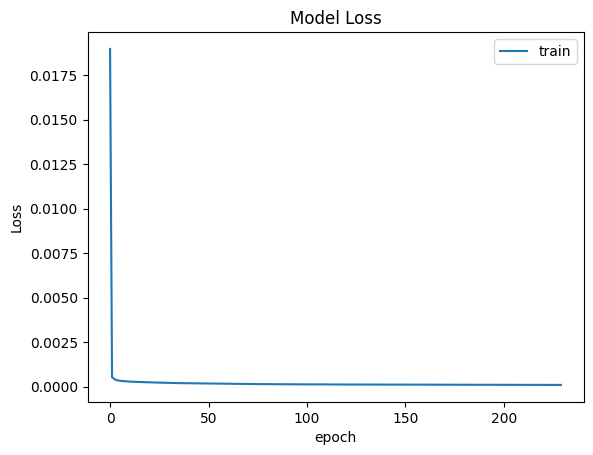

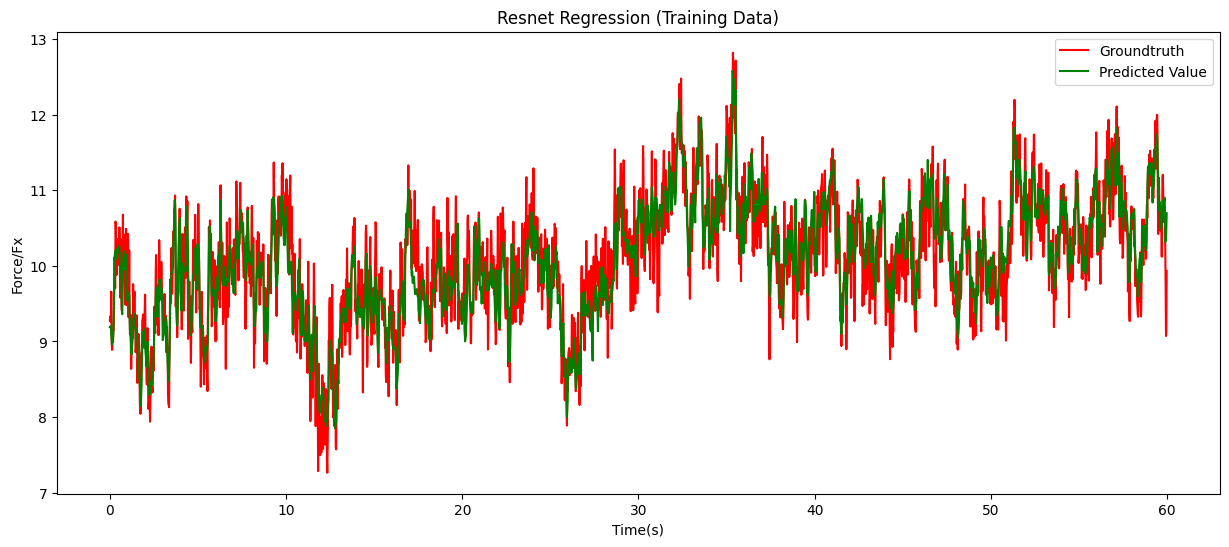

In [16]:
import math
from sklearn.metrics import mean_squared_error, r2_score

#Evaluate Model
Regression_Model.evaluate(train_data_reshaped, yscale)
ypred = Regression_Model.predict(train_data_reshaped)

plt.figure()
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

# print('MSE: ',mean_squared_error(normalized_FPData, ypred))
# print('RMSE: ',math.sqrt(mean_squared_error(normalized_FPData, ypred)))
# print('Coefficient of determination (r2 Score): ', r2_score(normalized_FPData, ypred))


#Inverse
# fx_real = scaler_fx.inverse_transform(normalized_fx)
# fy_real = scaler_fy.inverse_transform(normalized_fy)
# fz_real = scaler_fz.inverse_transform(normalized_fz)
# mx_real = scaler_mx.inverse_transform(normalized_mx)
# my_real = scaler_my.inverse_transform(normalized_my)
# mz_real = scaler_mz.inverse_transform(normalized_mz)

# fx_pred = scaler_fx.inverse_transform(ypred[:,0].reshape(-1,1))
# fy_pred = scaler_fy.inverse_transform(ypred[:,1].reshape(-1,1))
# fz_pred = scaler_fz.inverse_transform(ypred[:,2].reshape(-1,1))
# mx_pred = scaler_mx.inverse_transform(ypred[:,3].reshape(-1,1))
# my_pred = scaler_my.inverse_transform(ypred[:,4].reshape(-1,1))
# mz_pred = scaler_mz.inverse_transform(ypred[:,5].reshape(-1,1))

y_pred = scaler_y.inverse_transform(ypred) 
y_real = scaler_y.inverse_transform(yscale)

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,y_real[0:3000,i],color='red')
    plt.plot(x,y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()


In [17]:
print(y_real[:10])

[[9.27914047]
 [9.3324604 ]
 [9.26303005]
 [9.30597019]
 [9.65939999]
 [9.04283047]
 [8.88866043]
 [8.89955997]
 [9.10622025]
 [8.99438   ]]


In [18]:
print(y_pred[:10])

[[9.190815]
 [9.200065]
 [9.183531]
 [9.181904]
 [9.085741]
 [9.03087 ]
 [8.955845]
 [9.080528]
 [9.010455]
 [9.032758]]


In [19]:
FPDataset[:10]

array([[9.27914047],
       [9.3324604 ],
       [9.26303005],
       [9.30597019],
       [9.65939999],
       [9.04283047],
       [8.88866043],
       [8.89955997],
       [9.10622025],
       [8.99438   ]])

In [20]:
FPDataRealBack[:10]

NameError: name 'FPDataRealBack' is not defined

[  0.   0.  51.  36.   5.   0.   0.   0.   0.   0.   0.  69.  22.   0.
   0.   0.   0.   0.   0.   0.   0.  79.  83.  64.   1.   0.   0.   0.
   0.   3.  87.  85.  52.   0.  42.  43.   0.   0.   0.   0.  46.  62.
  45.  26.  11.   0.   0.   0.   9.  95.  86.  61.   0.   0.   0.   0.
   0.   0.   6.  54.  44.  48.  43.  40.  21.  57.  54. 119. 112.  92.
   0.   0.   0.   0.  30.  43. 101. 120. 126.  56.   0.   0.   7.  58.
  86.  39.   0.   0.  10.]
[  2.   0.   0.  64. 118. 123.  96.  55.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  99. 122. 110.  80.  33.   0.
   0.   0.   0.   0.  15.  35.  27.  39.   0.   0.   0.   0.   0.  28.
  92. 102.  92. 100.  55.   4.   0.   0.   0.  29.  51.  30.  45.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 101. 107.  16.   0.  32.  66.
  71.  34.   1.   0.   0.  36. 103. 102. 120. 115. 128.  94.  17.  38.
  96. 128. 124. 129.  71.]
94/94 [==============================] - 1s 8ms/step - loss: 0.0029 - mse: 0.0029
Testing Loss

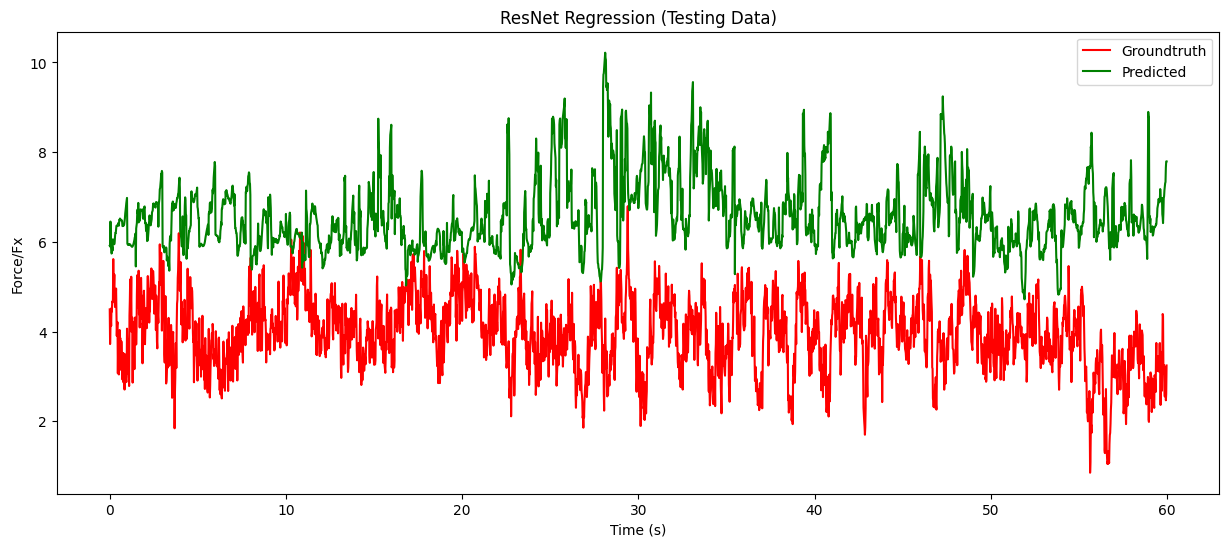

In [52]:
Ao = pd.read_csv('0312AbiStand5Min1.txt', header=None, low_memory=False)
AoE = np.asarray(Ao)
Test_AoE = np.array(AoE[3000:6000]).astype('float32')

Test_Insole = pd.read_csv('0319JacobStand5Min1.txt', header=None, low_memory=False)
TestSIData = np.asarray(Test_Insole)

Test_df = pd.read_csv('0312AryaStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[3000:6000]

Test_SmartInsole = np.array(TestSIData[3000:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

# # Create a mask for the zero positions in A
# mask = Test_AoE[:3000] == 0

# # Apply the mask to B to keep the same zero positions
# Test_SmartInsole = np.where(mask, 0, Test_SmartInsole)

# # Fill missing numbers in B based on the non-zero values in A
# Test_SmartInsole = np.where(Test_SmartInsole == 0, Test_AoE[:3000], Test_SmartInsole)


for i in range(len(Test_SmartInsole)):
    Test_SmartInsole[i][0] = Test_SmartInsole[i][0] + (iter % max_iter) + 1
    iter += 1
    
print(Test_AoE[1])
print(Test_SmartInsole[1])

# Test_smart_insole_data_scaled = (Test_SmartInsole - minInsole) / (maxInsole - minInsole)
# Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / (maxForcePlate - minForcePlate)
Test_smart_insole_data_scaled = scaler_x.transform(Test_SmartInsole)
Test_force_plate_data_scaled = scaler_y.transform(Test_FPData)


# Reshape testing data for model input
Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size, Test_time_steps,
                                                                 Test_input_dimension)

# Load the best saved model
# best_model = tf.keras.models.load_model('best_model.h5')

# Evaluate the model on testing data
test_loss, test_mse = Regression_Model.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
print('Testing Loss:', test_loss)
print('Testing MSE:', test_mse)

# Make predictions on testing data
test_predictions = Regression_Model.predict(Test_train_data_reshaped)

# Inverse transform the predictions and actual values
# test_predictions = (test_predictions * (maxForcePlate - minForcePlate)) + minForcePlate
# cleaned_test_fp = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate
test_predictions = scaler_y.inverse_transform(test_predictions) 
cleaned_test_fp = scaler_y.inverse_transform(Test_force_plate_data_scaled)

x = np.arange(0, test_predictions.shape[0]) * 60 / test_predictions.shape[0]
for i in range(1):
    plt.figure(figsize=(15, 6))
    plt.plot(x, cleaned_test_fp[:, i], color='red')
    plt.plot(x, test_predictions[:, i], markerfacecolor='none', color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
        plt.ylabel('Force/' + columns[i])
    else:
        plt.ylabel('Moment/' + columns[i])
    plt.xlabel('Time (s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

In [ ]:
test_predictions[:10]

In [ ]:
cleaned_test_fp[:10]